# Test sample DPP

In [1]:
using Statistics, LinearAlgebra, Distributions, Plots, Polynomials, AMRVW

In [2]:
function randprojDPP(Y)

    n = size(Y,2)
    𝓘 = fill(0,n)
    for k=1:n
        p = mean(abs.(Y).^2, dims=2)
        𝓘[k] = rand(Categorical(p[:]))
        Y=(Y*qr(Y[𝓘[k],:]).Q )[:,2:end] 
    end
    return(sort(𝓘))
end

function randDPP(Λ,Q)
    mask = rand.(Bernoulli.(Λ))
    return(randprojDPP(Q[:,mask]))
end

randDPP (generic function with 1 method)

In [3]:
# try kenel
KerB(n, x, y) = sum([(x*y)^j for j = 0:n])

KerB (generic function with 1 method)

In [4]:
x_span = -.995:0.005:.995
n = 200
K = [KerB(n, x, y) for x in x_span, y in x_span] * (x_span[2] - x_span[1]) / π # correct normalization
Λ, Q = eigen(K)
Λ[Λ .>= 1.0] .= 1.0
Λ[Λ .<= 1e-9] .= 0.0
sum(Λ)

2.044849579500851

In [5]:
randDPP(Λ, Q)

1-element Vector{Int64}:
 257

In [6]:
try_DPP = []
for i in 1:10000
    append!(try_DPP,randDPP(Λ, Q)) # use append!, otherwise cannot finish loop
end

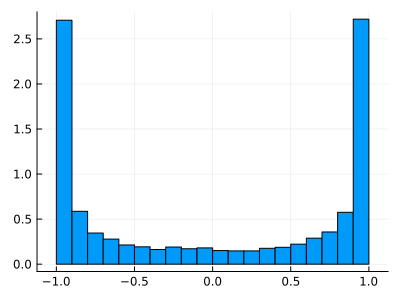

In [7]:
histogram(x_span[try_DPP], size = (400,300) ,normalize=:pdf, label=false, bins = 20)

In [8]:
savefig("../figures/test-11.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-11.pdf"

In [9]:
try_Poly = []
for i in 1:10000
    roots = AMRVW.roots(randn(n+1))
    append!(try_Poly, real(roots[isreal.(roots)])) # use append!, otherwise cannot finish loop
end

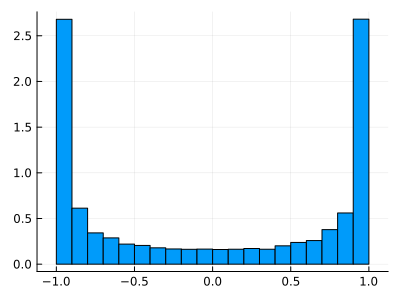

In [10]:
histogram(try_Poly[(try_Poly .>= -1) .& (try_Poly .<= 1)], size = (400,300) ,normalize=:pdf, label=false, bins = 20)

In [11]:
savefig("../figures/test-12.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-12.pdf"

In [12]:
length(try_Poly[(try_Poly .>= -1) .& (try_Poly .<= 1)])/10000

1.9789